### Exercise 13

#### Import

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, dirichlet, multinomial
from scipy.stats import gaussian_kde as kde
from statsmodels.distributions.empirical_distribution import ECDF

#### Data

In [2]:
n = 30
counts = np.array([2, 5, 3, 7, 5, 8])

### (a)

#### Functions

In [3]:
def get_posterior_sample(a, sim, counts):
    aPost = a + counts
    return dirichlet(aPost).rvs(sim)


def get_posterior_sample_alt(a, sim, counts, m):
    aPost = a + counts
    x = gamma(a=aPost).rvs((sim, m))
    return x / np.sum(x, axis=1).reshape((sim, 1))


def get_posterior_param_sample(a, sim, counts):
    result = np.zeros((4, sim))
    posterior_sample = get_posterior_sample(a, sim, counts)
    rho = posterior_sample[:, -1] / posterior_sample[:, 0]
    alpha = (1/6)*np.sum((posterior_sample - 1/6)**2, axis=1)
    beta = (1/6)*np.sum(np.abs(posterior_sample - 1/6), axis=1)
    gamma = (posterior_sample[:, 3] * posterior_sample[:, 4] * posterior_sample[:, 5] \
            / posterior_sample[:, 0] * posterior_sample[:, 1] * posterior_sample[:, 2])**(1/3)
    result[0] = rho
    result[1] = alpha
    result[2] = beta
    result[3] = gamma
    
    return result

#### Parameters

In [4]:
m = 6
priora = np.row_stack((np.ones(m), 3*np.ones(m), .1*np.ones(m)))
priornames = ['flat', 'symmetric but more confident', 'unwilling to guess']

sim = 100_000

#### Simulations and plots

Results for the flat prior:


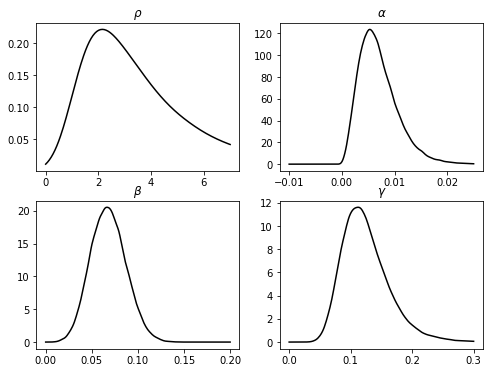


Results for the symmetric but more confident prior:


<Figure size 432x288 with 0 Axes>

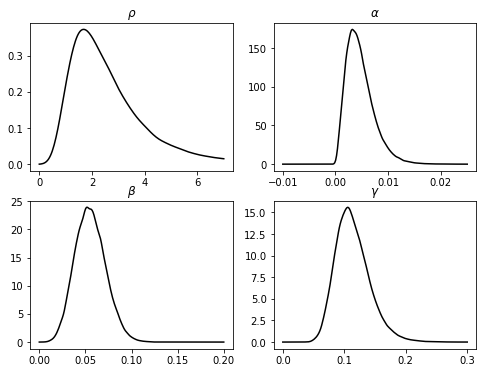


Results for the unwilling to guess prior:


<Figure size 432x288 with 0 Axes>

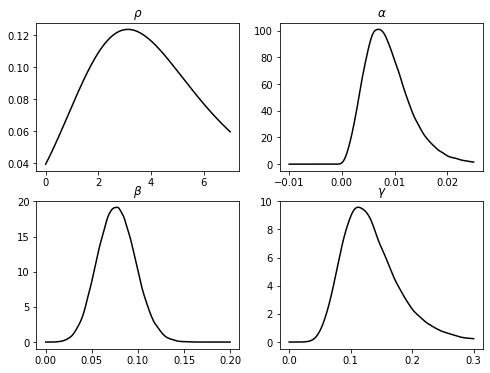

<Figure size 432x288 with 0 Axes>

In [5]:
for i in range(3): # loop through each prior choice
    print(f'Results for the {priornames[i]} prior:')
    
    a = priora[i]
    posterior_param_sample = get_posterior_param_sample(a, sim, counts)
    
    fig, axs = plt.subplots(2, 2, figsize=(8, 6))
    
    rhospace = np.linspace(0, 7, 200)
    alphaspace = np.linspace(-.01, .025, 200)
    betaspace = np.linspace(0, .2, 200)
    gammaspace = np.linspace(0, .3, 200)
    
    rho = posterior_param_sample[0]
    gamma = posterior_param_sample[-1]
    
    alpha = posterior_param_sample[1]
    beta = posterior_param_sample[2]
    
    axs[(0,0)].set_title(r'$\rho$')
    axs[(0,0)].plot(rhospace, kde(rho)(rhospace), color='black')
    
    axs[(0,1)].set_title(r'$\alpha$')
    axs[(0,1)].plot(alphaspace, kde(alpha)(alphaspace), color='black')
    
    axs[(1,0)].set_title(r'$\beta$')
    axs[(1,0)].plot(betaspace, kde(beta)(betaspace), color='black')
    
    axs[(1,1)].set_title(r'$\gamma$')
    axs[(1,1)].plot(gammaspace, kde(gamma)(gammaspace), color='black')
    
    plt.show()
    plt.tight_layout()
    plt.clf()
    print('')
    
    

### (b)

#### Posterior probability that $\theta = p_0$

In [6]:
p0 = (1/6)*np.ones(m)

for i in range(3):
    a = priora[i]
    dirichlet_logmarginal = dirichlet(a).logpdf(p0) + multinomial(n, p0).logpmf(counts) \
                            - dirichlet(a + counts).logpdf(p0)
    dirichlet_marginal = np.exp(dirichlet_logmarginal)

    degenerate_marginal = multinomial(n, p0).pmf(counts)
    
    full_marginal = .5*dirichlet_marginal + .5*degenerate_marginal
    
    posterior_prob_p0 = .5*degenerate_marginal / full_marginal
                                      
    print(f'Posterior probability that theta=p0 under the {priornames[i]} prior: {posterior_prob_p0}')
    
    
    

Posterior probability that theta=p0 under the flat prior: 0.9173023072298073
Posterior probability that theta=p0 under the symmetric but more confident prior: 0.6860334304835696
Posterior probability that theta=p0 under the unwilling to guess prior: 0.9999369801066067


#### Functions

In [7]:
def get_posterior_param_sample_new(a, sim, counts, p0):
    # this is a simple test SSH key comment
    dirichlet_logmarginal = dirichlet(a).logpdf(p0) + multinomial(n, p0).logpmf(counts) \
                            - dirichlet(a + counts).logpdf(p0)
    dirichlet_marginal = np.exp(dirichlet_logmarginal)

    degenerate_marginal = multinomial(n, p0).pmf(counts)
    
    full_marginal = .5*dirichlet_marginal + .5*degenerate_marginal
    
    posterior_prob_p0 = .5*degenerate_marginal / full_marginal
    
    
    result = np.zeros((4, sim))
    posterior_dirichlet_sample = get_posterior_sample(a, sim, counts)
    U = np.random.random(sim)
    posterior_sample = (U < posterior_prob_p0).reshape((sim, 1)) * p0 \
                            + (U >= posterior_prob_p0).reshape((sim, 1)) * posterior_dirichlet_sample
    
    rho = posterior_sample[:, -1] / posterior_sample[:, 0]
    alpha = (1/6)*np.sum((posterior_sample - 1/6)**2, axis=1)
    beta = (1/6)*np.sum(np.abs(posterior_sample - 1/6), axis=1)
    gamma = (posterior_sample[:, 3] * posterior_sample[:, 4] * posterior_sample[:, 5])**(1/3) \
            / (posterior_sample[:, 0] * posterior_sample[:, 1] * posterior_sample[:, 2])**(1/3)
    result[0] = rho
    result[1] = alpha
    result[2] = beta
    result[3] = gamma
    
    return result

#### Simulation and plots

Results for the flat prior:


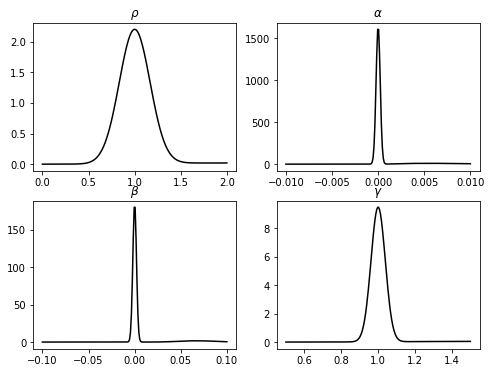


Results for the symmetric but more confident prior:


<Figure size 432x288 with 0 Axes>

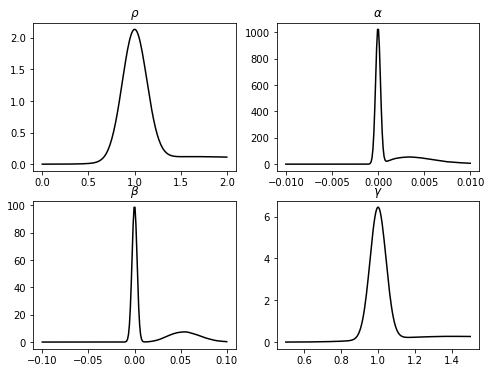


Results for the unwilling to guess prior:


<Figure size 432x288 with 0 Axes>

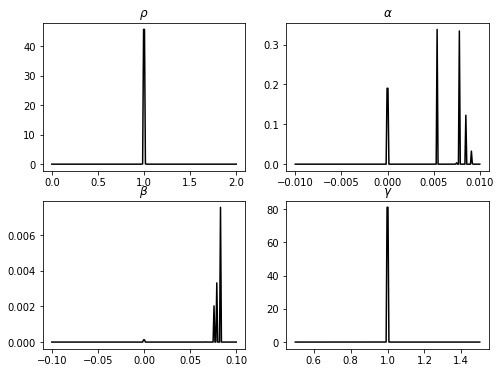

<Figure size 432x288 with 0 Axes>

In [8]:
for i in range(3): # loop through each prior choice
    print(f'Results for the {priornames[i]} prior:')
    
    a = priora[i]
    posterior_param_sample = get_posterior_param_sample_new(a, sim, counts, p0)
    
    fig, axs = plt.subplots(2, 2, figsize=(8, 6))
    
    rhospace = np.linspace(0, 2, 200)
    alphaspace = np.linspace(-.01, .01, 200)
    betaspace = np.linspace(-.1, .1, 200)
    gammaspace = np.linspace(.5, 1.5, 200)
    
    rho = posterior_param_sample[0]
    gamma = posterior_param_sample[-1]
    
    alpha = posterior_param_sample[1]
    beta = posterior_param_sample[2]
    
    axs[(0,0)].set_title(r'$\rho$')
    axs[(0,0)].plot(rhospace, kde(rho)(rhospace), color='black')
    
    axs[(0,1)].set_title(r'$\alpha$')
    axs[(0,1)].plot(alphaspace, kde(alpha)(alphaspace), color='black')
    
    axs[(1,0)].set_title(r'$\beta$')
    axs[(1,0)].plot(betaspace, kde(beta)(betaspace), color='black')
    
    axs[(1,1)].set_title(r'$\gamma$')
    axs[(1,1)].plot(gammaspace, kde(gamma)(gammaspace), color='black')
    
    plt.show()
    plt.tight_layout()
    plt.clf()
    print('')

#### With CDFs

Results for the flat prior:


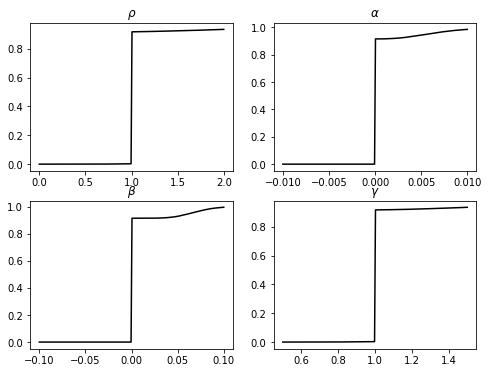


Results for the symmetric but more confident prior:


<Figure size 432x288 with 0 Axes>

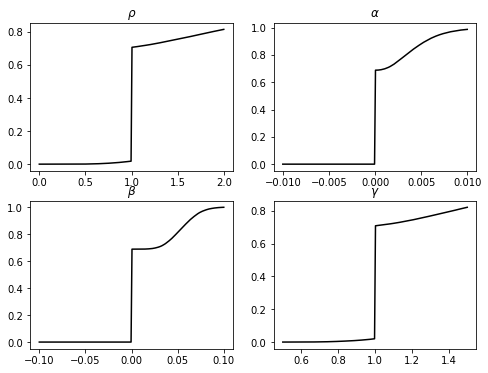


Results for the unwilling to guess prior:


<Figure size 432x288 with 0 Axes>

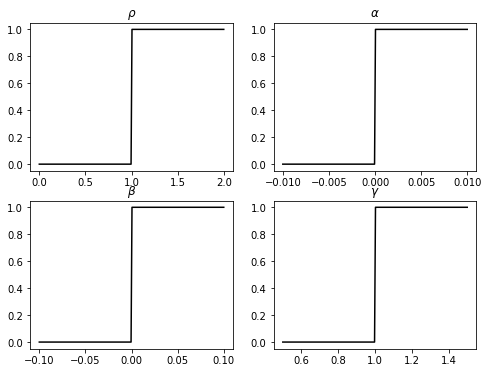

<Figure size 432x288 with 0 Axes>

In [12]:
for i in range(3): # loop through each prior choice
    print(f'Results for the {priornames[i]} prior:')
    
    a = priora[i]
    posterior_param_sample = get_posterior_param_sample_new(a, sim, counts, p0)
    
    fig, axs = plt.subplots(2, 2, figsize=(8, 6))
    
    rhospace = np.linspace(0, 2, 200)
    alphaspace = np.linspace(-.01, .01, 200)
    betaspace = np.linspace(-.1, .1, 200)
    gammaspace = np.linspace(.5, 1.5, 200)
    
    rho = posterior_param_sample[0]
    gamma = posterior_param_sample[-1]
    
    alpha = posterior_param_sample[1]
    beta = posterior_param_sample[2]
    
    axs[(0,0)].set_title(r'$\rho$')
    axs[(0,0)].plot(rhospace, ECDF(rho)(rhospace), color='black')
    
    axs[(0,1)].set_title(r'$\alpha$')
    axs[(0,1)].plot(alphaspace, ECDF(alpha)(alphaspace), color='black')
    
    axs[(1,0)].set_title(r'$\beta$')
    axs[(1,0)].plot(betaspace, ECDF(beta)(betaspace), color='black')
    
    axs[(1,1)].set_title(r'$\gamma$')
    axs[(1,1)].plot(gammaspace, ECDF(gamma)(gammaspace), color='black')
    
    plt.show()
    plt.tight_layout()
    plt.clf()
    print('')